# 8: Clustering

The hand-in exercise for this topic is Exercise 1 from the notebook “Exercises in Clustering.ipynb”.

---

### Assemble + Installs + Imports

In [39]:
# Lib imports for the notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [40]:
# read the csv
df = pd.read_csv("Ch5_bike_station_locations.csv")

---

### Initial EDA

In [41]:
df.head(10)

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620
5,38.927799,-77.084738
6,38.888698,-76.919470
7,38.863403,-76.982420
8,38.885703,-76.919518
9,38.919268,-76.954753


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   244 non-null    float64
 1   longitude  244 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [43]:
df.describe()

,latitude,longitude
count,244.000000,244.000000
mean,38.914289,-77.010109
std,0.035435,0.041084
min,38.827425,-77.106502
25%,38.891574,-77.031987
50%,38.916397,-77.011474
75%,38.935887,-76.985866
max,38.987980,-76.919470


---

### Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

---

### 1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

My approach to this is to draw the elbow method in a plot and read with my eye, a suffecient k.

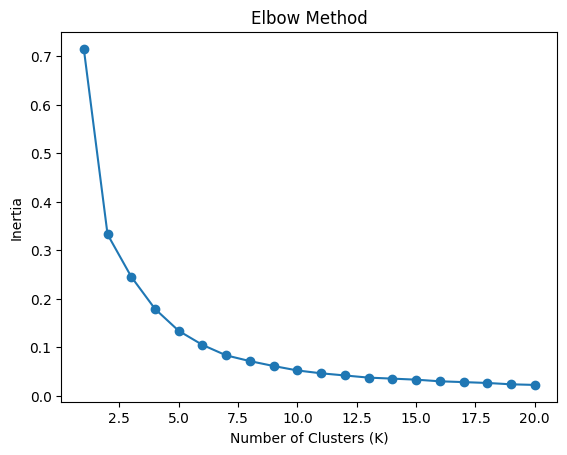

In [44]:
# Features
X = df[['latitude', 'longitude']]
# Plot elbow method to choose a sufficient k
inertia = []
K_range = range(1, 21)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

---

### 2. Visualize the K-Means clustering result for the best K. Apply Agglomerative clustering to the dataset. Draw the D

Now initialize KMeans clustering with the optimal K and plot it to create visualization

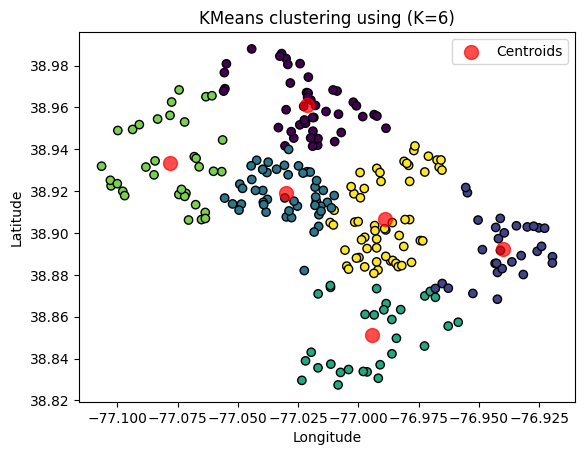

In [45]:
# Read the plot and choose the optimal k, put it here...
best_k = 6
# Init KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)
# Plot the clusters
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', marker='o', alpha=0.7, s=100, label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans clustering using (K=' + str(best_k) +')')
plt.legend()
plt.show()

In [46]:
# prediction to be used later for evaluation
kmeans_pred = kmeans.fit_predict(X)

---

### 3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.

To find a sensible amount of clusters by reading a dendogram, you should make a horizontal slice, just before the longest vertical jump on the dendrogram (The largest difference).
* I will put a red line indicating my opinion of the optimal slice.

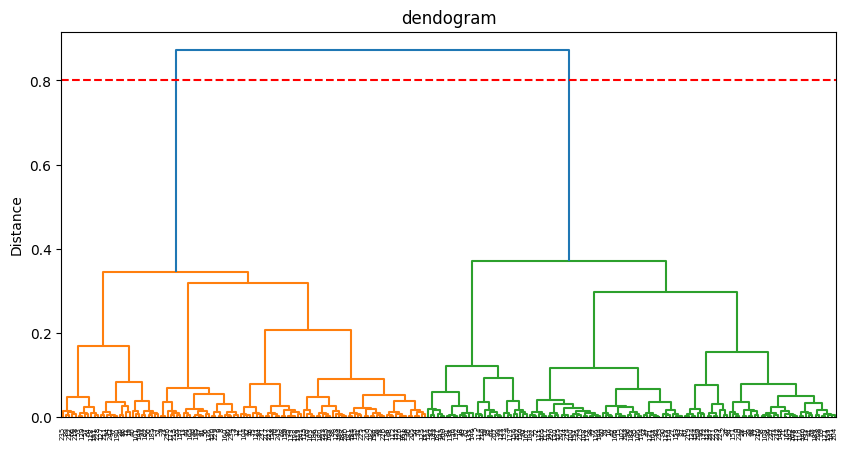

In [47]:
# hierarchical clustering matrix
linkage_matrix = linkage(X, method='ward')
# plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.ylabel("Distance")
plt.title("dendogram")
plt.axhline(y=0.8, color='r', linestyle='--', label="Cut-off for Clusters")  # Slice to chose amount of clusters
plt.show()

Leaving two clusters using this method

---

### 4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.

We will use the reading of 2 clusters from the previous task to pass into the Agglomerative Clustering Algorithm

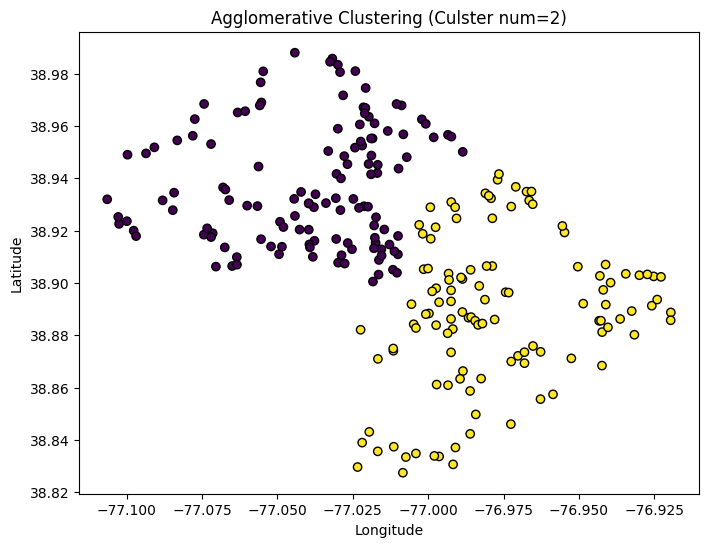

In [48]:
# Choose amount of clusters based on the previous dendrogram reading
dendro_result = 2
# Init Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=dendro_result)
df['cluster'] = agg_clustering.fit_predict(X)
# Plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Agglomerative Clustering (Culster num=' + str(dendro_result) + ')')
plt.show()

In [49]:
# Prediciton to be used later for evaluation
agg_pred = agg_clustering.fit_predict(X)

---

### 5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.) + 6. Visual the final DBSCAN clustering you decided upon in 5.

Doing both these task with a visualization, looking for the tightest and most defined clusters

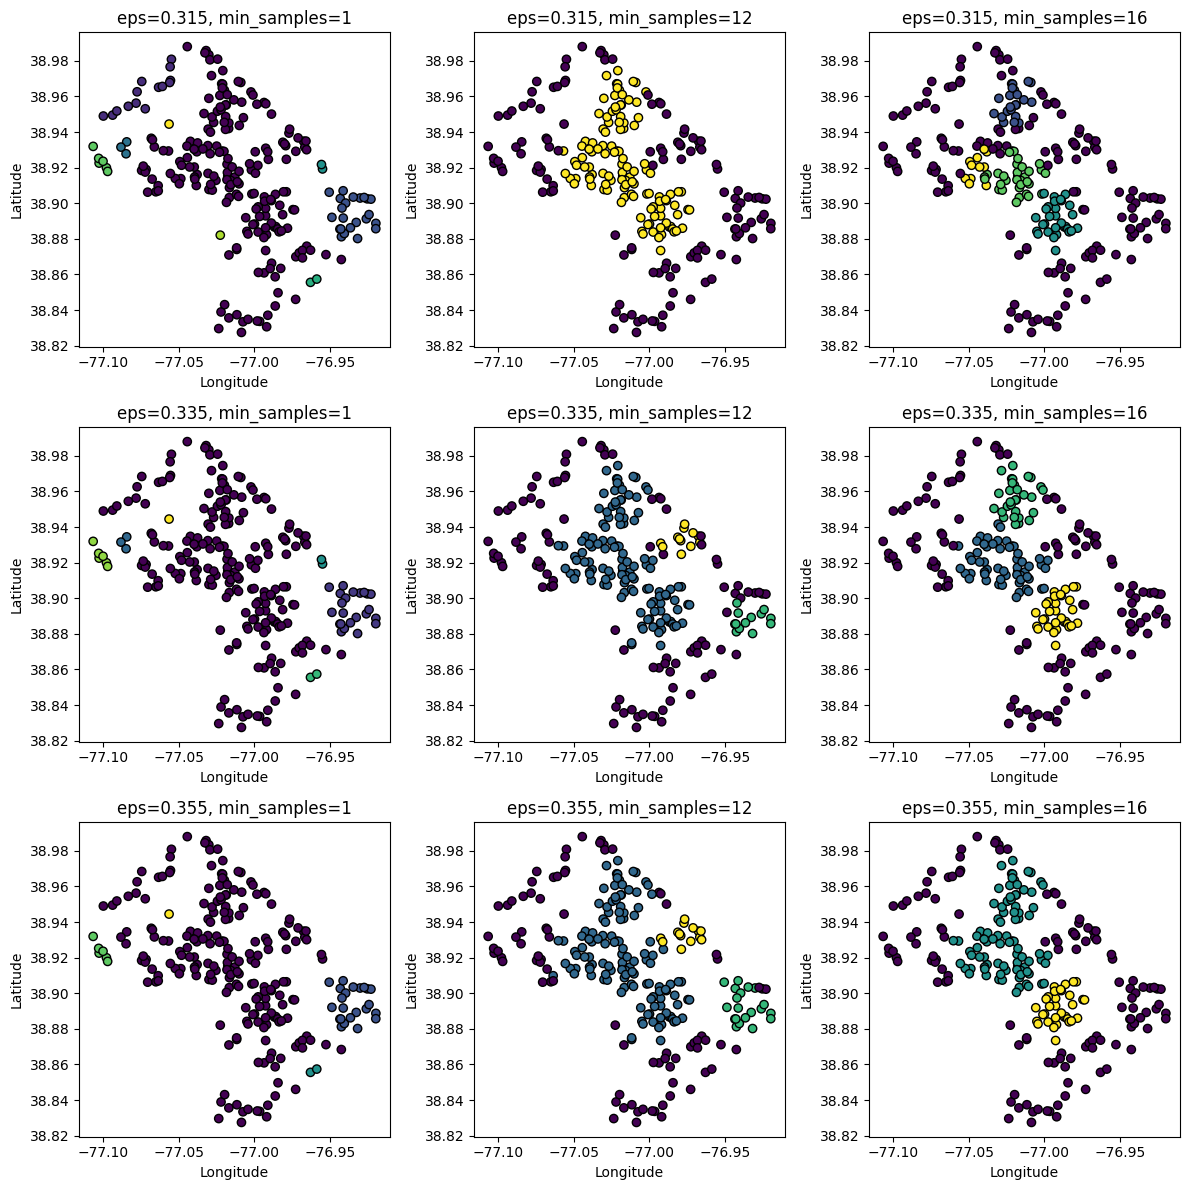

In [50]:
# Since we are now using DBScan we should scale the features as DBScan weighs higher numbers more...
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Try different values of eps and min_samples
eps_values = [0.315, 0.335, 0.355]
min_samples_values = [1, 12, 16]
# Create subplots to compare different parametersss
# I Create alot to emphasize the difference effect of values, if there is any
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(12, 12))
# For loop the different values
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Init DBScan
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        # Scatter plot of clusters
        ax = axes[i, j]
        ax.scatter(df['longitude'], df['latitude'], c=clusters, edgecolors='k')
        ax.set_title('eps=' + str(eps) + ', min_samples=' + str(min_samples))
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

#### Take aways

* The graphs are quite hard to read and choose good values from
* Instead we proceed to try other eps and min sample values
* As well as getting concrete calculations outputs as numbers

In [51]:
eps_values = [0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
min_samples_values = [3, 5, 7, 10]
for min_samples in min_samples_values:
    print(f"--- min_samples = {min_samples} ---")
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['latitude', 'longitude']])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.3f}, clusters={n_clusters}, noise points={n_noise}")

--- min_samples = 3 ---
eps=0.010, clusters=10, noise points=10
eps=0.012, clusters=5, noise points=8
eps=0.014, clusters=2, noise points=1
eps=0.016, clusters=1, noise points=0
eps=0.018, clusters=1, noise points=0
eps=0.020, clusters=1, noise points=0
--- min_samples = 5 ---
eps=0.010, clusters=10, noise points=26
eps=0.012, clusters=6, noise points=13
eps=0.014, clusters=4, noise points=3
eps=0.016, clusters=1, noise points=0
eps=0.018, clusters=1, noise points=0
eps=0.020, clusters=1, noise points=0
--- min_samples = 7 ---
eps=0.010, clusters=6, noise points=87
eps=0.012, clusters=5, noise points=40
eps=0.014, clusters=3, noise points=29
eps=0.016, clusters=2, noise points=8
eps=0.018, clusters=1, noise points=0
eps=0.020, clusters=1, noise points=0
--- min_samples = 10 ---
eps=0.010, clusters=5, noise points=126
eps=0.012, clusters=3, noise points=98
eps=0.014, clusters=2, noise points=59
eps=0.016, clusters=3, noise points=28
eps=0.018, clusters=3, noise points=7
eps=0.020, clust

### Visualizing the best DBScan

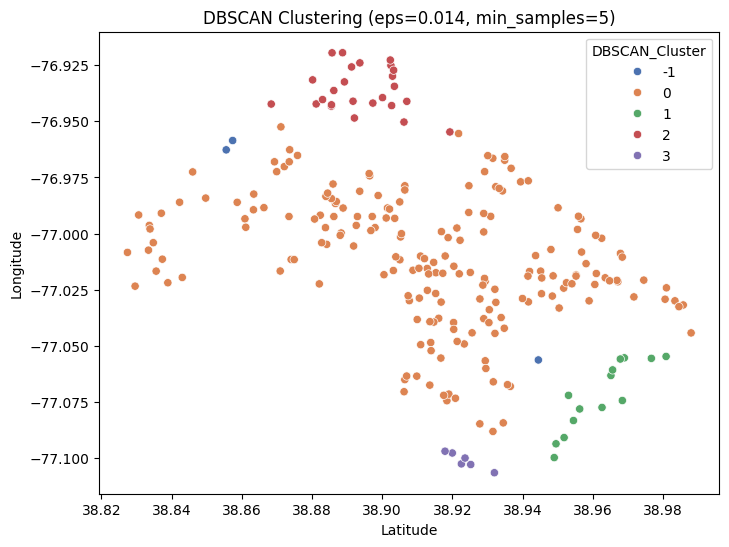

In [52]:
best_eps = 0.014
min_samples = 5

# Apply DBSCAN to the raw bike dataset
dbscan_final = DBSCAN(eps=best_eps, min_samples=min_samples)
df['DBSCAN_Cluster'] = dbscan_final.fit_predict(df[['latitude', 'longitude']])

# Visualize the clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='DBSCAN_Cluster', palette='deep')
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={min_samples})")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

---

### 7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

Using the evaluation metric of "Silhouette scores" i will now measure the clustering approaches

In [53]:
print("KMeans silhouette score: " + str(silhouette_score(X, kmeans_pred)))
print("Agg silhouette score: " + str(silhouette_score(X, agg_pred)))
X_dbscan = df[['latitude', 'longitude']]
sil_dbscan = silhouette_score(X_dbscan, df['DBSCAN_Cluster'])
print("DBSCAN silhouette score:" + str(sil_dbscan))

KMeans silhouette score: 0.41157747363641684
Agg silhouette score: 0.44647668733997165
DBSCAN silhouette score:0.11689060172769881


---